<a href="https://colab.research.google.com/github/Zenologos/Data-Analysis/blob/master/TSB_Model_MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os, sys
from os.path import *
from sklearn.metrics import mean_squared_error,mean_absolute_error
from mpmath import *

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_path = 'gdrive/My Drive/Corey_Hendricks/Data'  #change dir to your project folder

In [ ]:
hypothesis = 5
file = 'h5_yr_0_4_adi.csv'

In [ ]:
datafolder = join(root_path,file)

In [ ]:
df = pd.read_csv(datafolder)

In [ ]:
df.shape

(1866, 214)

In [ ]:
df.head()

,repair_part_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,...,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,adi,avg_demand,variance,cv2
0,011-175-0362,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.666667,7.333333,80.222222,1.491736
1,0177C1005-9,921.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209.000000,921.000000,0.000000,0.000000
2,0177C1005LF,2580.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,26.0,0.0,0.0,0.0,0.0,18.0,10.0,20.0,0.0,13.0,17.0,27.0,23.0,64.0,2.0,53.0,0.0,15.0,20.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,10.0,50.0,26.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,4.0,12.0,20.0,0.0,16.0,4.0,155.0,0.0,49.0,32.0,28.0,10.0,0.0,0.0,8.0,28.0,42.0,189.0,0.0,1.971698,44.037736,62153.413670,32.049040
3,01G-P3-2631-KR,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,41.800000,2.400000,1.440000,0.250000
4,02-0709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.666667,1.000000,0.000000,0.000000


In [ ]:
df.columns

Index(['repair_part_number', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0',
       ...
       '203.0', '204.0', '205.0', '206.0', '207.0', '208.0', 'adi',
       'avg_demand', 'variance', 'cv2'],
      dtype='object', length=214)

In [ ]:
df.isnull().sum()

repair_part_number    0
0.0                   0
1.0                   0
2.0                   0
3.0                   0
                     ..
208.0                 0
adi                   0
avg_demand            0
variance              0
cv2                   0
Length: 214, dtype: int64

In [ ]:
df.index

RangeIndex(start=0, stop=1866, step=1)

In [ ]:
if hypothesis == 3:
  df.insert(loc=1, column='0.0', value=0.0)
  df.insert(loc=3, column='2.0', value=0.0)
  df.insert(loc=4, column='3.0', value=0.0)
  df.insert(loc=5, column='4.0', value=0.0)
  df.insert(loc=6, column='5.0', value=0.0)
  df.insert(loc=7, column='6.0', value=0.0)
  df.insert(loc=8, column='7.0', value=0.0)
  df.insert(loc=9, column='8.0', value=0.0)
  df.insert(loc=10, column='9.0', value=0.0)
  df.insert(loc=11, column='10.0', value=0.0)
  df.insert(loc=12, column='11.0', value=0.0)
  df.insert(loc=13, column='12.0', value=0.0)

In [ ]:
df

,repair_part_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,...,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,adi,avg_demand,variance,cv2
0,011-175-0362,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.666667,7.333333,80.222222,1.491736
1,0177C1005-9,921.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209.000000,921.000000,0.000000,0.000000
2,0177C1005LF,2580.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,26.0,0.0,0.0,0.0,0.0,18.0,10.0,20.0,0.0,13.0,17.0,27.0,23.0,64.0,2.0,53.0,0.0,15.0,20.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,10.0,50.0,26.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,4.0,12.0,20.0,0.0,16.0,4.0,155.0,0.0,49.0,32.0,28.0,10.0,0.0,0.0,8.0,28.0,42.0,189.0,0.0,1.971698,44.037736,62153.413670,32.049040
3,01G-P3-2631-KR,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,41.800000,2.400000,1.440000,0.250000
4,02-0709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.666667,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,XTI1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.500000,1.000000,0.000000,0.000000
1862,Y3644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.500000,1.000000,0.000000,0.000000
1863,YT900294801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209.000000,1.000000,0.000000,0.000000
1864,Z0RG,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209.000000,1.0000

In [ ]:
  if hypothesis == 3:
    df.insert(loc=332, column='331.0', value=0.0)
    df.insert(loc=333, column='332.0', value=0.0)
    df.insert(loc=334, column='333.0', value=0.0)
    df.insert(loc=335, column='334.0', value=0.0)

In [ ]:
df

,repair_part_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,...,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,adi,avg_demand,variance,cv2
0,011-175-0362,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.666667,7.333333,80.222222,1.491736
1,0177C1005-9,921.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209.000000,921.000000,0.000000,0.000000
2,0177C1005LF,2580.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,26.0,0.0,0.0,0.0,0.0,18.0,10.0,20.0,0.0,13.0,17.0,27.0,23.0,64.0,2.0,53.0,0.0,15.0,20.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,10.0,50.0,26.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,4.0,12.0,20.0,0.0,16.0,4.0,155.0,0.0,49.0,32.0,28.0,10.0,0.0,0.0,8.0,28.0,42.0,189.0,0.0,1.971698,44.037736,62153.413670,32.049040
3,01G-P3-2631-KR,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,41.800000,2.400000,1.440000,0.250000
4,02-0709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.666667,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,XTI1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.500000,1.000000,0.000000,0.000000
1862,Y3644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104.500000,1.000000,0.000000,0.000000
1863,YT900294801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209.000000,1.000000,0.000000,0.000000
1864,Z0RG,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209.000000,1.0000

In [ ]:
# Cutoff - June 1,2017 - Cut off 282 out of 334 weeks - for all years
# Cutoff - June 1, 2013 - 73 out of 104 weeks - test size = 104-73 = 31 weeks - for 0-2 years
# Cutoff - June 1, 2015 - 178 out of 208 weeks - test size = 208 - 178 = 30 weeks for 0-4 years
train = df.loc[:,'0.0':'282.0'].copy()
test = df.loc[:,'282.0':'334.0'].copy()

In [ ]:
train.shape, test.shape

((1866, 283), (1866, 53))

In [ ]:
len(test.columns)

53

In [ ]:
test.columns

Index(['282.0', '283.0', '284.0', '285.0', '286.0', '287.0', '288.0', '289.0',
       '290.0', '291.0', '292.0', '293.0', '294.0', '295.0', '296.0', '297.0',
       '298.0', '299.0', '300.0', '301.0', '302.0', '303.0', '304.0', '305.0',
       '306.0', '307.0', '308.0', '309.0', '310.0', '311.0', '312.0', '313.0',
       '314.0', '315.0', '316.0', '317.0', '318.0', '319.0', '320.0', '321.0',
       '322.0', '323.0', '324.0', '325.0', '326.0', '327.0', '328.0', '329.0',
       '330.0', '331.0', '332.0', '333.0', '334.0'],
      dtype='object')

In [ ]:
# Metrics used from the Github link shared earlier. 
def _error(actual, predicted):
    """ Simple error """
    return actual - predicted

def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """ Naive forecasting method which just repeats previous samples """
    return actual[:-seasonality]
    
def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return np.mean(np.abs(_error(actual, predicted)))

def rmsse(actual,predicted, seasonality: int = 1):
    """ Root Mean Squared Scaled Error """
    # actual = row[0]
    # predicted = row[1]
    q = np.abs(_error(actual, predicted)) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))
    return np.sqrt(np.mean(np.square(q)))

def amse(actual,predicted, seasonality: int = 1):
  """Absolute Mean Sqaured Error"""
  q = np.abs(_error(actual, predicted)) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))
  return np.mean(q)

In [ ]:
# # Code written by me to calculate RMMSE and MASE. NOT USING THIS! 
# def my_rmsse(yt,yt_hat,h):
#   # len(yt)=53, h = 53, len(yt_hat)= 335
#   n = yt_hat.shape[0]-yt.shape[0]-1  #length of the actual train set = 282
#   numerator = (1/h)*np.sum(np.square(_error(yt, yt_hat.loc[n+1:n+h,'Forecast'])))
#   denomenator = (1/(n-1))*np.sum(np.square(_error(yt_hat.loc[1:n,'Demand'], yt_hat.loc[0:n-1,'Demand'])))
#   if np.isnan(numerator) or np.isnan(denomenator):
#     return 0
#   else:
#     return np.sqrt(numerator / denomenator)

# def mase(yt,yt_hat,h):
#   n = yt_hat.shape[0]-yt.shape[0]-1  #length of the actual train set = 282
#   # print(len(yt_hat.loc[n+1:n+h,'Forecast']),len(yt_hat.loc[1:n,'Demand']),len(yt_hat.loc[0:n-1,'Demand'])) # 53,282, 282
#   numerator = mpf(1/h)*mpf(np.sum(np.abs(yt - yt_hat.loc[n+1:n+h,'Forecast'])))
#   denomenator = mpf(1/(n-1))*mpf(np.sum(np.abs(yt_hat.loc[1:n,'Demand'] - yt_hat.loc[0:n-1,'Demand'])))
#   print(numerator,denomenator)
#   return numerator / denomenator


In [ ]:
# Code from Nicholas Vandeput. Change alpha, beta and extra_periods values here. extra_periods is the forecating horizon(h)
# extra_periods = 53 (for entire time range), 32(for 0 - 2 yrs), 31 (for 0 - 4 yrs)
def Croston_TSB(train_row,test_row,extra_periods=53,alpha=0.05,beta=0.05): # change the time period here for H5
  d = np.array(train_row) # Transform the input into a numpy array
  cols = len(d) # Historical period length
  d = np.append(d,[np.nan]*extra_periods) # Append np.nan into the demand array to cover future periods
  
  #level (a), probability(p) and forecast (f)
  a,p,f = np.full((3,cols+extra_periods),np.nan)
# Initialization
  first_occurence = np.argmax(d[:cols]>0)
  a[0] = d[first_occurence]
  p[0] = 1/(1 + first_occurence)
  f[0] = p[0]*a[0]
                
  # Create all the t+1 forecasts
  for t in range(0,cols):
    if d[t] > 0:
      a[t+1] = alpha*d[t] + (1-alpha)*a[t] 
      p[t+1] = beta*(1) + (1-beta)*p[t]  
    else:
      a[t+1] = a[t]
      p[t+1] = (1-beta)*p[t]       
      f[t+1] = p[t+1]*a[t+1]
      
  # Future Forecast
  a[cols+1:cols+extra_periods] = a[cols]
  p[cols+1:cols+extra_periods] = p[cols]
  f[cols+1:cols+extra_periods] = f[cols]
                    
  pred = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Period":p,"Level":a,"Error":d-f})
  pred.fillna(value=0,inplace=True) # to take care of Nan values 
  rmse_value = mean_squared_error(test_row,pred.loc[283:,'Forecast'],squared=False) # change the time period here for H5
  mae_value = mean_absolute_error(test_row,pred.loc[283:,'Forecast']) # change the time period here for H5
  # rmsse_value = rmsse(test_row,pred.loc[282:,'Forecast'],extra_periods)
  # amse_value = amse(test_row,pred.loc[:,['Demand','Forecast']],extra_periods)
  # my_rmsse_value = my_rmsse(test_row,pred.loc[:,['Demand','Forecast']],extra_periods) # for this, all of original train is needed, and just the predictions
  # mase_value = mase(test_row,pred.loc[:,['Demand','Forecast']],extra_periods)
  return rmse_value,mae_value

In [ ]:
train.index, test.index

(RangeIndex(start=0, stop=1866, step=1),
 RangeIndex(start=0, stop=1866, step=1))

In [ ]:
train[['rmse','mae']] = train.apply(lambda train_row: Croston_TSB(train_row,test.iloc[train_row.name]), axis=1, result_type='expand')

In [ ]:
# np.sum(train['rmse']> 1),train['rmsse'].isnull().sum()

In [ ]:
# np.sum(train['mae']> 1),train['mae'].isnull().sum() 

In [ ]:
train

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,...,245.0,246.0,247.0,248.0,249.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0,272.0,273.0,274.0,275.0,276.0,277.0,278.0,279.0,280.0,281.0,282.0,rmse,mae
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.632251e-02,8.632251e-02
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,22.0,0.0,14.0,0.0,126.0,0.0,34.0,0.0,24.0,0.0,12.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,16.0,0.0,0.0,0.0,6.137645e+01,1.381901e+01
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,26.0,0.0,0.0,0.0,0.0,18.0,10.0,20.0,0.0,13.0,17.0,27.0,23.0,64.0,2.0,53.0,0.0,15.0,20.0,11.0,5.0,...,32.0,24.0,36.0,0.0,14.0,60.0,126.0,0.0,32.0,152.0,42.0,10.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,32.0,0.0,0.0,0.0,7.939209e+01,2.777762e+01
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.722619e-01,6.550268e-02
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.812119e-03,5.812119e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.794861e-05,5.794861e-05
1862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.515715e-03,2.515715e-03
1863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.483696e-07,2.483696e-07
1864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.693279e-03,1.693279e-03


In [ ]:
mean_rmse = train['rmse'].mean()

In [ ]:
mean_mae = train['mae'].mean()

In [ ]:
print(f'RMSE for Hypothesis {hypothesis} is {mean_rmse}')  # reduces a lot if the row 20326 is dropped. So outliers? 

RMSE for Hypothesis 5 is 0.5622456099533921


In [ ]:
print(f'MAE for Hypothesis {hypothesis} is {mean_mae}') 

MAE for Hypothesis 5 is 0.30587706998979886


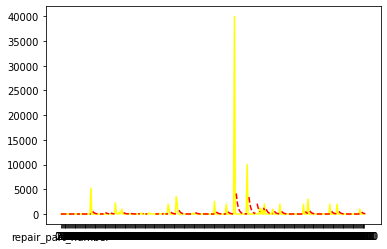

In [ ]:
# plot of a single row (part number)
# plt.plot(df.columns[:-5],df.loc[20326,'0.0':'334.0'],'yellow') #actual
# plt.plot(sample_row.index, sample_row['Forecast'],'r--') #predicted
# plt.xticks(ticks=None);
# # plt.xlim(0,350);
# # plt.ylim(-0.5,5);